# Plot metrics for RF3 model

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_csv("all_metrics.csv")

In [90]:
df.columns

Index(['chain_ptm', 'chain_pair_pae_min', 'chain_pair_pde_min',
       'chain_pair_pae', 'chain_pair_pde', 'overall_plddt', 'overall_pde',
       'overall_pae', 'ptm', 'iptm', 'has_clash', 'ranking_score',
       'bb_sc_rmsd', 'bb_target_aligned_rmsd', 'binder_sequence',
       'sequence_length', 'name'],
      dtype='object')

In [91]:
columns_to_plot = ['ptm',
            'iptm',
            'bb_sc_rmsd',
            'bb_target_aligned_rmsd']

(0.0, 10.0)

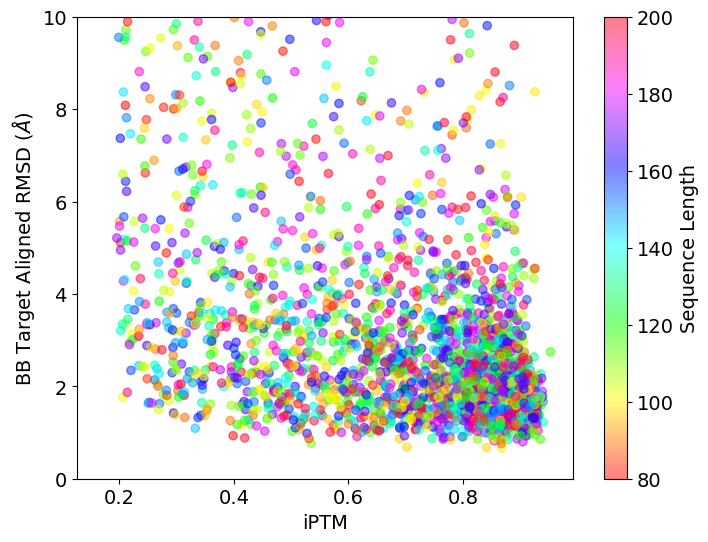

In [92]:
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 14})
plt.scatter(df['iptm'],df['bb_target_aligned_rmsd'],alpha=0.5, c=df["sequence_length"], cmap="hsv")
plt.xlabel('iPTM')
plt.colorbar(label='Sequence Length')
plt.ylabel(r'BB Target Aligned RMSD $(\AA)$')
plt.ylim(0,10)

Text(0, 0.5, 'BB Target Aligned RMSD $(\\AA)$')

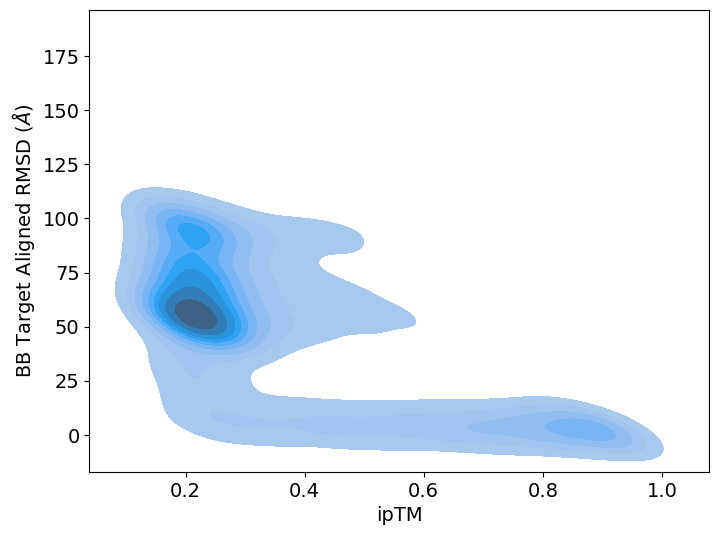

In [104]:
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 14})
sns.kdeplot(x=df['iptm'], y=df['bb_target_aligned_rmsd'], fill=True)
plt.xlabel('ipTM')
plt.ylabel(r'BB Target Aligned RMSD $(\AA)$')

(0.0, 10.0)

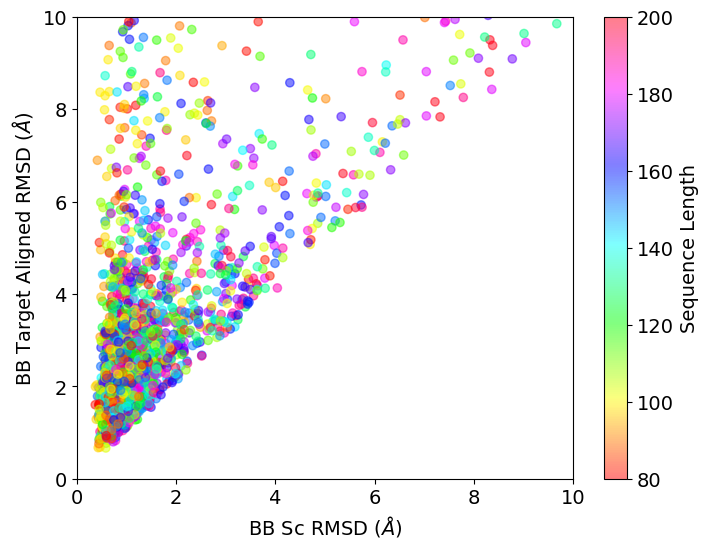

In [93]:
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 14})
plt.scatter(df['bb_sc_rmsd'],df['bb_target_aligned_rmsd'], c=df['sequence_length'], cmap='hsv', alpha=0.5)
plt.xlabel(r'BB Sc RMSD $(\AA)$')
plt.ylabel(r'BB Target Aligned RMSD $(\AA)$')
plt.colorbar(label='Sequence Length')
plt.ylim(0,10)
plt.xlim(0,10)

<>:4: SyntaxWarning: invalid escape sequence '\A'
<>:4: SyntaxWarning: invalid escape sequence '\A'
/tmp/ipykernel_630641/2507270859.py:4: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('BB Sc RMSD $(\AA)$')


Text(0, 0.5, 'BB Target Aligned RMSD $(\\AA)$')

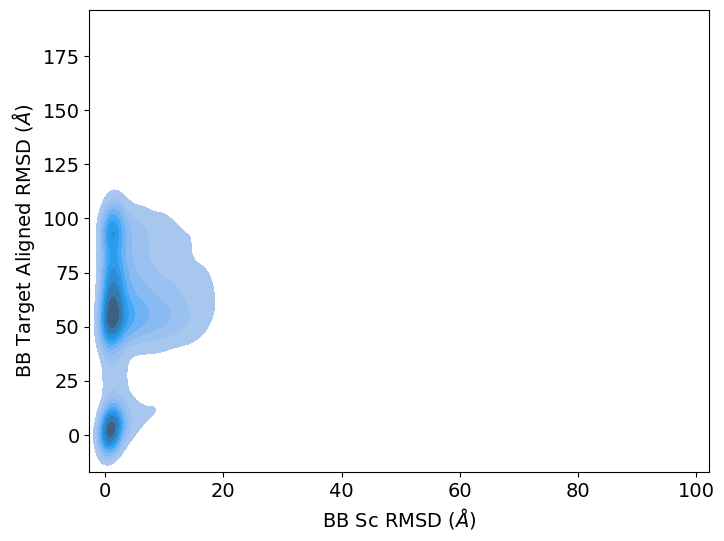

In [105]:
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 14})
sns.kdeplot(x=df['bb_sc_rmsd'], y=df['bb_target_aligned_rmsd'], fill=True)
plt.xlabel('BB Sc RMSD $(\AA)$')
plt.ylabel(r'BB Target Aligned RMSD $(\AA)$')

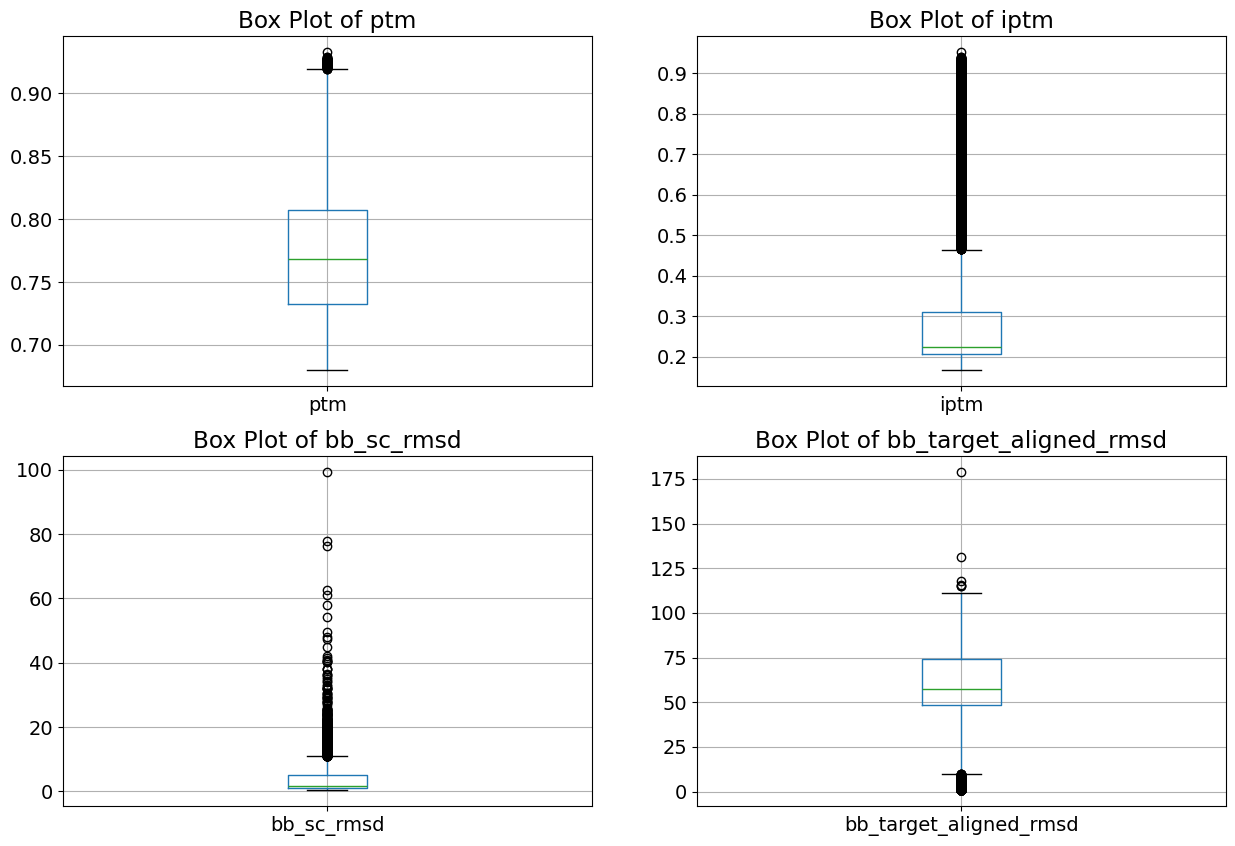

In [94]:
n_cols = 2  # Set number of columns in the subplot grid
# Calculate rows needed using ceiling division
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
if n_rows * n_cols > 1:
    axes = axes.flatten()
else:
    axes = [axes] # Ensure it's always iterable

for i, col in enumerate(columns_to_plot):
    # Pass the current column name and the specific axes object to boxplot()
    df.boxplot(column=col, ax=axes[i])
    
    # Set a clear title for the subplot
    axes[i].set_title(f'Box Plot of {col}')
    
    # Remove the default x-axis label for a cleaner subplot view
    axes[i].set_xlabel('')

<Figure size 800x600 with 0 Axes>

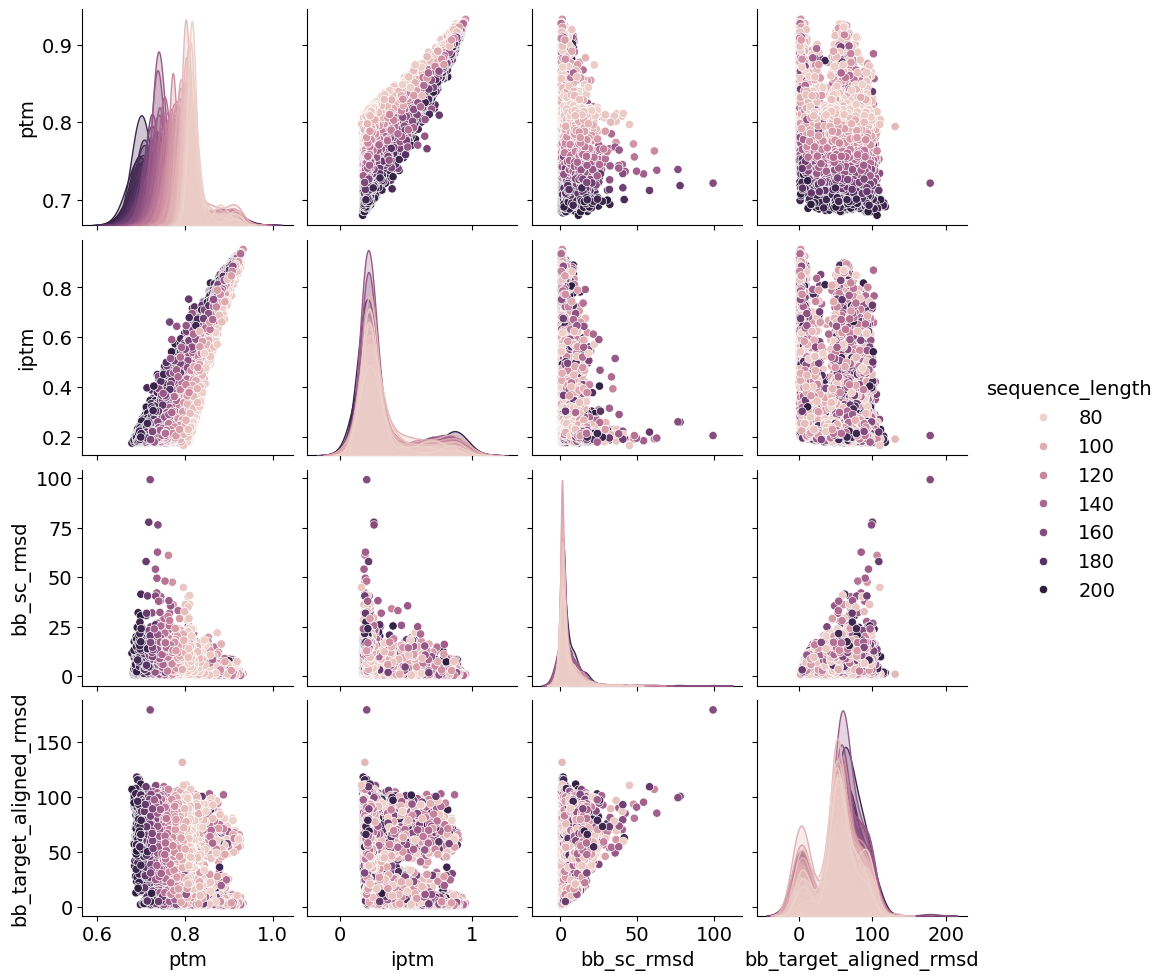

In [107]:
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 14})
pair_plot = sns.pairplot(df, vars=columns_to_plot, hue='sequence_length')

<Figure size 1600x1600 with 0 Axes>

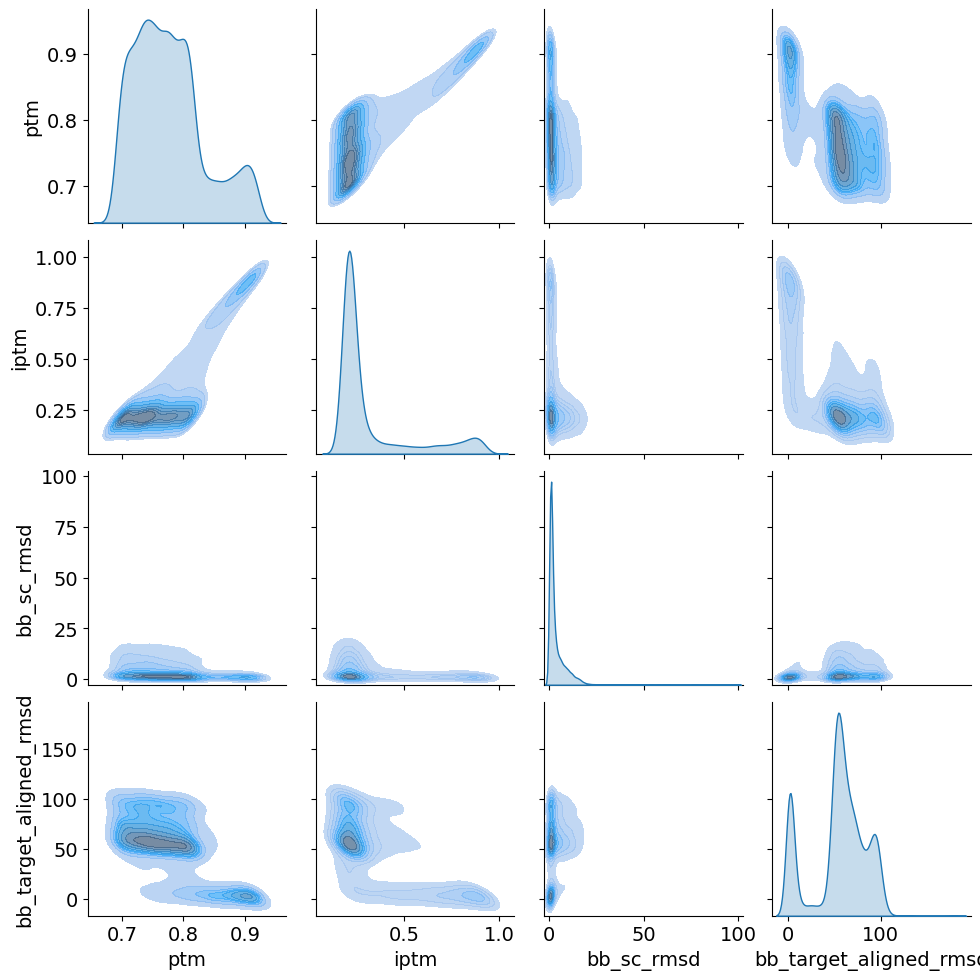

In [111]:
plt.figure(figsize=(16, 16))
plt.rcParams.update({'font.size': 14})
pair_plot = sns.pairplot(df, vars=columns_to_plot, kind="kde", plot_kws={'fill': True, 'alpha': 0.7})

In [98]:
len(df[(df['bb_target_aligned_rmsd'] < 3) & (df['iptm'] > 0.7) & (df['bb_sc_rmsd'] < 2)]['binder_sequence'].unique())

1052